# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


%matplotlib inline

In [2]:
df = sns.load_dataset('tips')

# Porcentangem que a gorjeta representa do valor pago
df['tip_pct'] = df['tip'] / df['total_bill']

# Valor liquido pago sem a gorjeta
df['net_bill'] = df['total_bill'] - df['tip'] 

# Removo outliers
df = df[ df['tip_pct'] < 0.5 ]

df.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,17.51


### I. Modelo no valor da gorjeta
Índice <a name="topo"></a>

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```. 
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

# 1.a Criação da matriz de designer <a name="1"></a>

In [3]:
y, X = patsy.dmatrices(data = df, formula_like = 'tip ~ sex + smoker + time + net_bill + 1')

reg = sm.OLS(y, X)

modelo = reg.fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     33.32
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           4.54e-22
Time:                        18:19:52   Log-Likelihood:                -368.45
No. Observations:                 243   AIC:                             746.9
Df Residuals:                     238   BIC:                             764.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0911      0.239      4.

# 1.b Removendo variaveis não significantes

In [4]:
# Removendo variáveis que ficaram com um p-value muito alto (sexo e time)

y, X = patsy.dmatrices(data = df, formula_like = 'tip ~ smoker + net_bill + 1')

reg = sm.OLS(y, X)

modelo = reg.fit()

# 1.c Gráfico de resíduos em função de net_bill

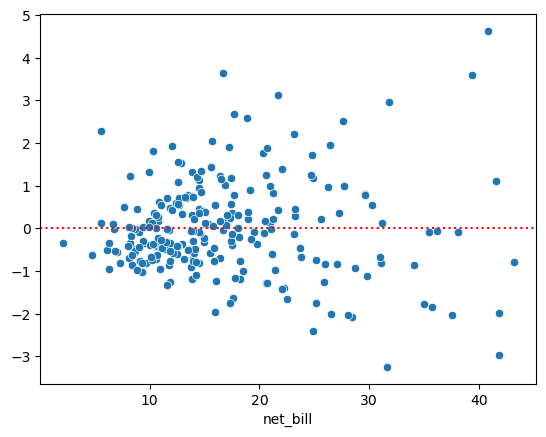

In [5]:
ax = sns.scatterplot(data = df, x = 'net_bill', y = modelo.resid)

ax.axhline(y = 0, color = 'red', linestyle = ':')

plt.show()

# 1.d Tranformando net_bill em log e polinômio.

- Abaixo, pode-se conferir que a transformação para log apresentou melhores resultados.

In [6]:
# TRANFORMANDO NET_BILL EM LOG:

y, X = patsy.dmatrices(data = df, 
                       formula_like = 'tip ~ sex + smoker + time + np.log(net_bill) + 1')

reg = sm.OLS(y, X)
modelo = reg.fit()

r_squared_log = modelo.rsquared



# TRANFORMANDO NET_BILL EM POLINÔMIO:

y, X = patsy.dmatrices(data = df, 
                       formula_like = 'tip ~ sex + smoker + time + np.power(net_bill, 2) + 1')

reg = sm.OLS(y, X)
modelo = reg.fit()

r_squared_polinomio = modelo.rsquared



print(f"R-squared com log(net_bill) = {round(r_squared_log*100, 2)}%")
print(f"R-squared com power(net_bill) = {round(r_squared_polinomio*100, 2)}%")

R-squared com log(net_bill) = 35.37%
R-squared com power(net_bill) = 31.79%


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip_pct```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

# 2.a Criação da matriz designer

In [7]:
y, X = patsy.dmatrices(data = df, formula_like = 'tip_pct ~ sex + smoker + time + net_bill + 1')

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     15.66
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           2.18e-11
Time:                        18:19:52   Log-Likelihood:                 412.43
No. Observations:                 243   AIC:                            -814.9
Df Residuals:                     238   BIC:                            -797.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2036      0.010     21.

# 2.b Remoção das variáveis não significantes

In [8]:
# REMOVENDO 'SMOKER' E 'TIME' QUE FICARAM COM UM P-VALUE MAIOR QUE 60%

y, X = patsy.dmatrices(data = df, formula_like = 'tip_pct ~ sex + net_bill')

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     31.33
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           8.12e-13
Time:                        18:19:52   Log-Likelihood:                 412.23
No. Observations:                 243   AIC:                            -818.5
Df Residuals:                     240   BIC:                            -808.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2034      0.007     27.584

# 2.c Gráfico de resíduos

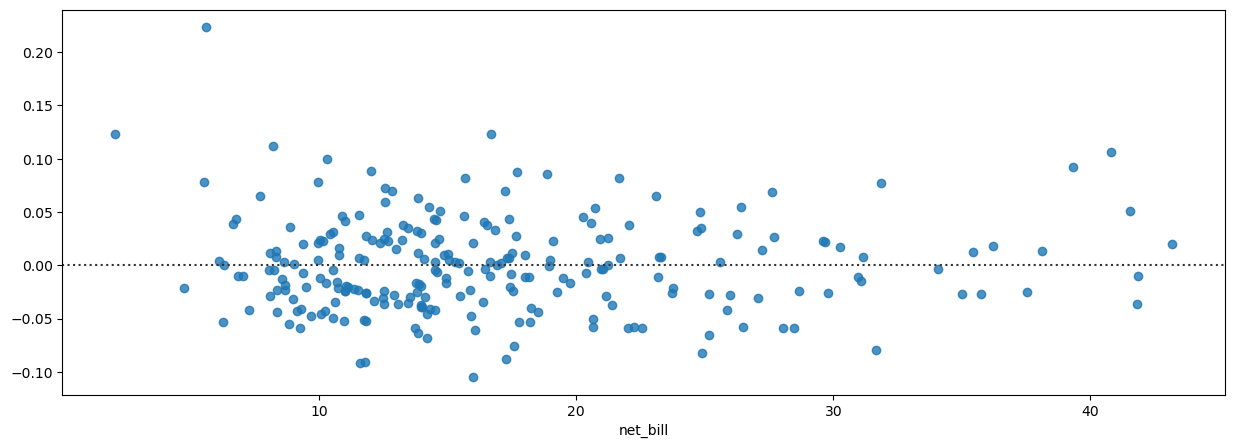

In [9]:
plt.figure(figsize=[15,5])

sns.residplot(data = df, x = 'net_bill', y = modelo.resid)

plt.show()

# 2.d Tranformando net_bill em log e polinômio.

- Abaixo, pode-se conferir que a transformação para log apresentou melhores resultados.

In [10]:
# TRANFORMANDO NET_BILL EM LOG:

y, X = patsy.dmatrices(data = df, 
                       formula_like = 'tip_pct ~ sex + smoker + time + np.log(net_bill) + 1')

reg = sm.OLS(y, X)
modelo = reg.fit()

r_squared_log = modelo.rsquared



# TRANFORMANDO NET_BILL EM POLINÔMIO:

y, X = patsy.dmatrices(data = df, 
                       formula_like = 'tip_pct ~ sex + smoker + time + np.power(net_bill, 2) + 1')

reg = sm.OLS(y, X)
modelo = reg.fit()

r_squared_polinomio = modelo.rsquared



print(f"R-squared com log(net_bill) = {round(r_squared_log*100, 2)}%")
print(f"R-squared com power(net_bill) = {round(r_squared_polinomio*100, 2)}%")

R-squared com log(net_bill) = 24.1%
R-squared com power(net_bill) = 16.92%


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

##### Carregando e preparando a base

In [11]:
df = pd.read_csv('previsao_de_renda.csv')

# Troca valores faltantes pela mediana 
df['tempo_emprego'].fillna(value = df['tempo_emprego'].median(), inplace=True)

df.head(3)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98


# 3.a Criação do modelo e exibição dos gráficos

R-SQUARED = 0.1502386513782239


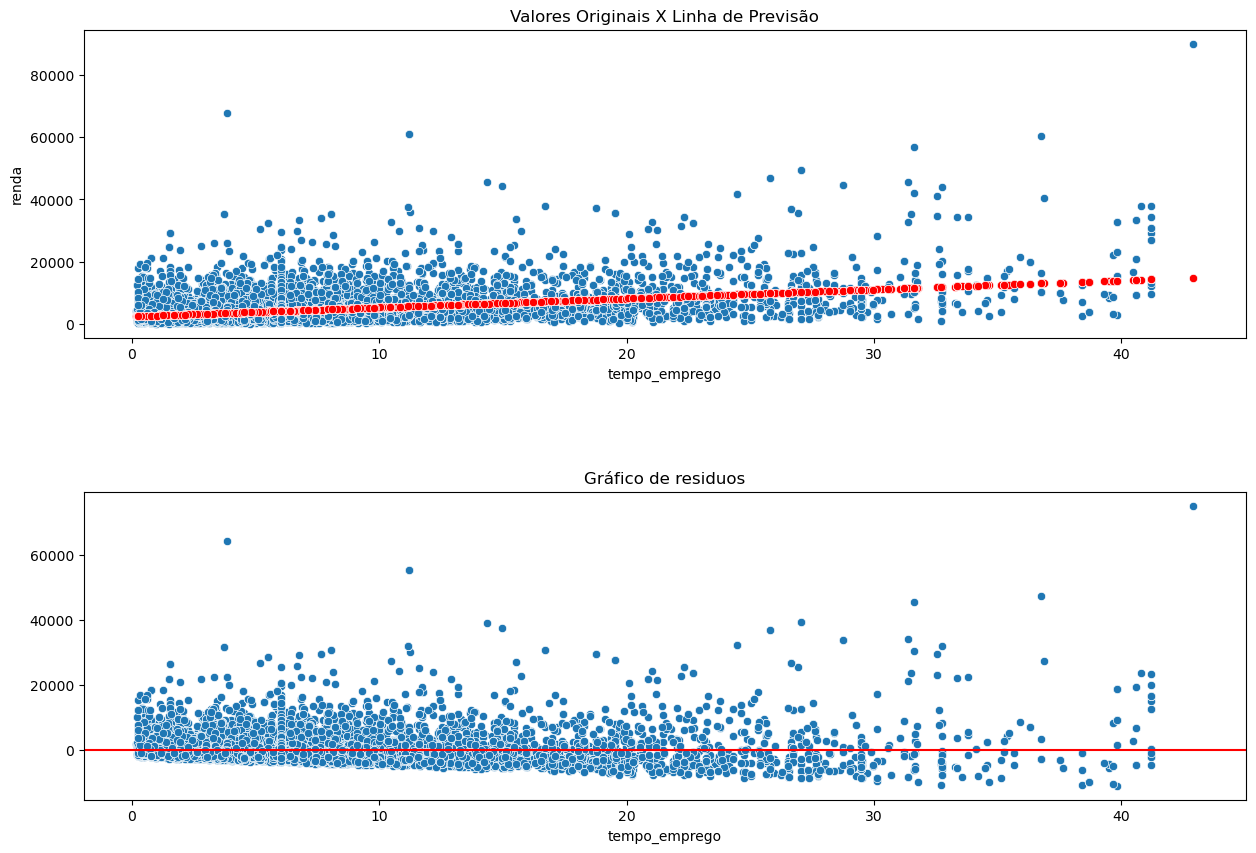

In [12]:
modelo = smf.ols(data = df, formula = 'renda ~ tempo_emprego + 1').fit()


print(f'R-SQUARED = {modelo.rsquared}')


figura, axes = plt.subplots(nrows=2, ncols=1, figsize = [15,10])
figura.subplots_adjust(hspace=0.5)


# Gráfico dos valores originais com a linha de previsão
axes[0].set_title("Valores Originais X Linha de Previsão")
sns.scatterplot(data = df, x = 'tempo_emprego', y = 'renda', ax = axes[0])
sns.scatterplot(data = df, x = 'tempo_emprego', y = modelo.fittedvalues, color = 'red', ax = axes[0])


# Gráfico de residuos
axes[1].set_title("Gráfico de residuos")
sns.scatterplot(data = df, x = 'tempo_emprego', y = modelo.resid)
axes[1].axhline(y=0, color = 'red')



plt.show()

# 3.b Transformações para melhorar a regressão

* Primeira opção: transformando a variavel responsta para LOG.

R-SQUARED = 0.12865544512879468


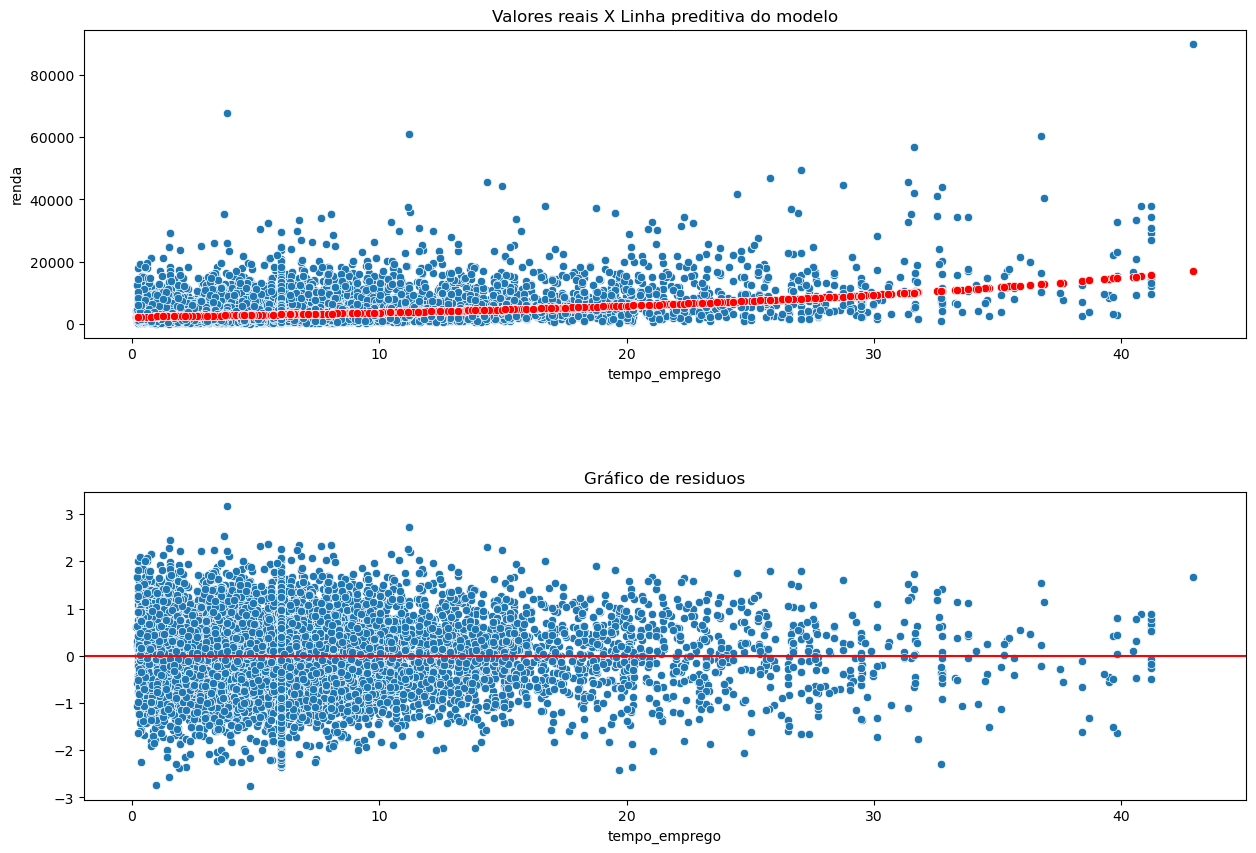

In [13]:
# TESTE COM LOG DA VARIAVEL RESPOSTA


#Crio o modelo
modelo = smf.ols(data = df, formula = 'np.log(renda) ~ tempo_emprego + 1').fit()

print(f"R-SQUARED = {modelo.rsquared}")


figura, axes = plt.subplots(nrows=2, ncols=1, figsize=[15, 10])
figura.subplots_adjust(hspace=0.5)


# Gráfico valores reais X linha de previsao
axes[0].set_title("Valores reais X Linha preditiva do modelo")
sns.scatterplot(data = df, x = 'tempo_emprego', y = 'renda', ax = axes[0])
sns.scatterplot(data = df, x = 'tempo_emprego', y = np.exp(modelo.fittedvalues), color = 'red', ax = axes[0])


# Gráfico de residuos
axes[1].set_title("Gráfico de residuos")
sns.scatterplot(data = df, x = 'tempo_emprego', y = modelo.resid, ax = axes[1])
axes[1].axhline(y = 0, color = 'red')


* Segunda opção: transformando variável resposta para o seu quadrado.

R-SQUARED = 0.08117904753764704


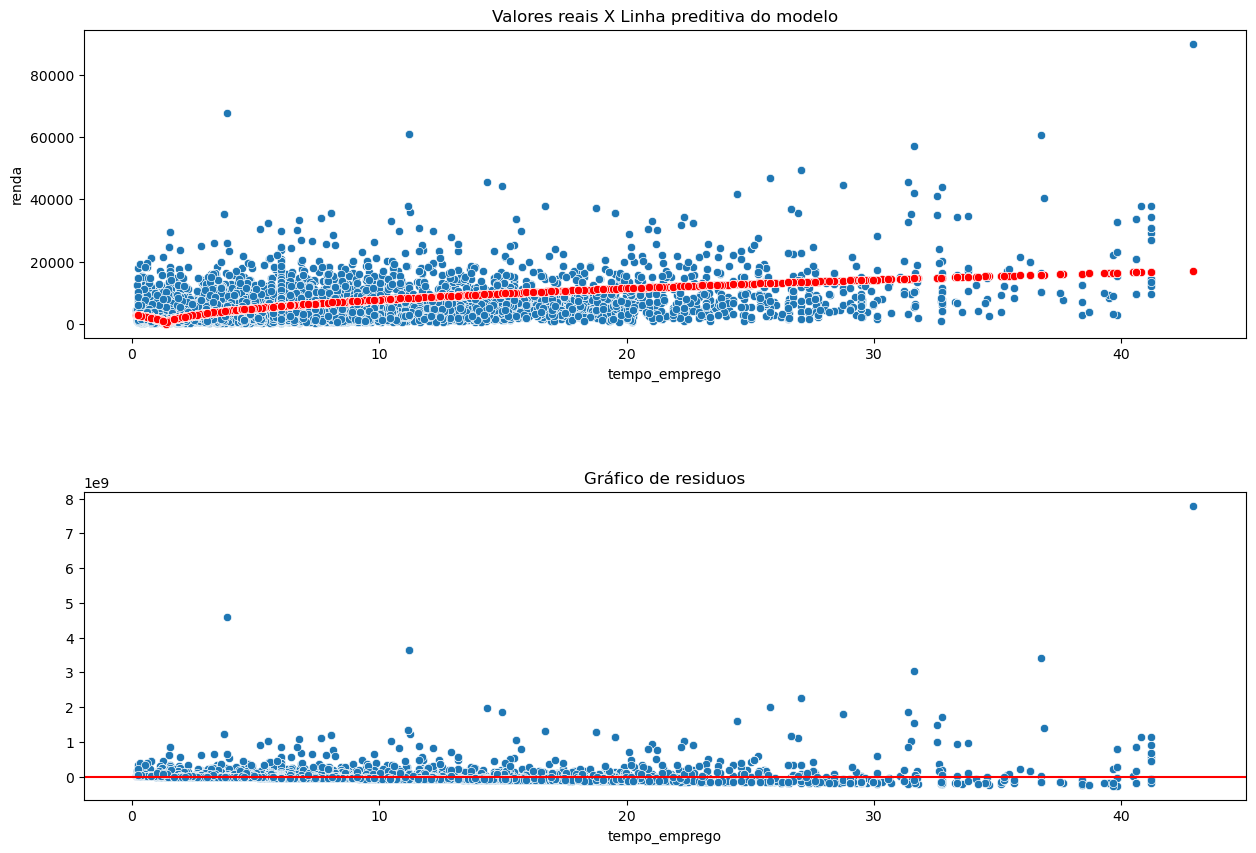

In [14]:
# TESTE COM POTENCIA DA VARIAVEL RESPOSTA


#Crio o modelo
modelo = smf.ols(data = df, formula = 'np.power(renda, 2) ~ tempo_emprego + 1').fit()

print(f"R-SQUARED = {modelo.rsquared}")


figura, axes = plt.subplots(nrows=2, ncols=1, figsize=[15, 10])
figura.subplots_adjust(hspace=0.5)


# Gráfico valores reais X linha de previsao
axes[0].set_title("Valores reais X Linha preditiva do modelo")
sns.scatterplot(data = df, x = 'tempo_emprego', y = 'renda', ax = axes[0])
sns.scatterplot(data = df, x = 'tempo_emprego', y = np.sqrt(abs(modelo.fittedvalues)), color = 'red', ax = axes[0])


# Gráfico de residuos
axes[1].set_title("Gráfico de residuos")
sns.scatterplot(data = df, x = 'tempo_emprego', y = modelo.resid, ax = axes[1])
axes[1].axhline(y = 0, color = 'red')


# 3.c Criação de um modelo de regressão linear múlttplo para 'renda'

In [15]:
y, X = patsy.dmatrices(data = df, 
                       formula_like = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + 1')


modelo = sm.OLS(y, X).fit()


print( modelo.summary() )

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     175.8
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:19:55   Log-Likelihood:            -1.4602e+05
No. Observations:               15000   AIC:                         2.921e+05
Df Residuals:                   14975   BIC:                         2.923e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# 3.d Remoção das variáveis não significantes

##### * Variaveis que serão removidas: 
- posse_de_veiculo............: P-VALUE = 0.50
- estado_civil......................: P-VALUE = 0.20+
- qtd_filhos.........................: P-VALUE = 0.273
- qt_pessoas_residencia....: P-VALUE = 0.240

> Criação do modelo sem as variaveis acima

In [16]:
y, X = patsy.dmatrices(data = df, 
                       formula_like = 'renda ~ sexo + posse_de_imovel + tipo_renda + educacao + tipo_residencia + idade + tempo_emprego + 1')


modelo = sm.OLS(y, X).fit()


print( modelo.summary() )

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     247.9
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:19:55   Log-Likelihood:            -1.4602e+05
No. Observations:               15000   AIC:                         2.921e+05
Df Residuals:                   14982   BIC:                         2.922e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# 3.e Analise dos resíduos:

> Idade:

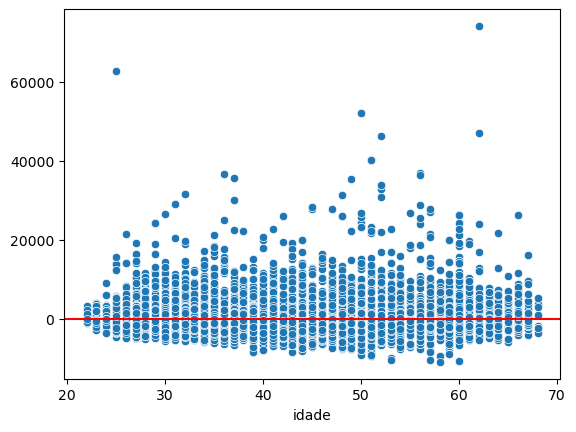

In [17]:
ax = sns.scatterplot(data = df, x = 'idade', y = modelo.resid)
ax.axhline(y=0, color='red')

> tempo_emprego

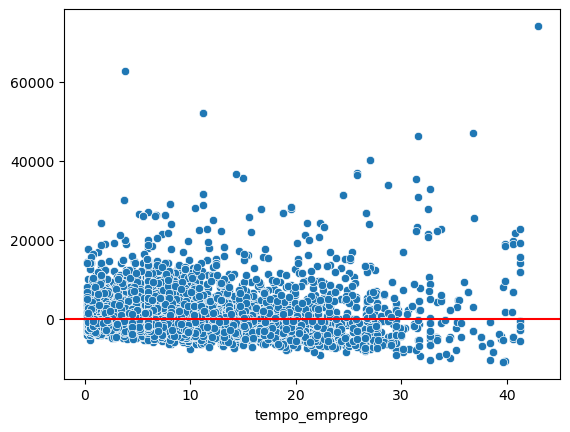

In [18]:
ax = sns.scatterplot(data = df, x = 'tempo_emprego', y = modelo.resid)
ax.axhline(y=0, color='red')